In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd /content/drive/MyDrive/Prism_worklet

/content/drive/MyDrive/Prism_worklet


In [ ]:
!python read_audio_make_RGB.py

In [ ]:
import numpy as np
rgb1=np.load("/content/drive/MyDrive/Prism_worklet/audio_images/RGB_sound1.npy",mmap_mode='r+')
rgb2=np.load("/content/drive/MyDrive/Prism_worklet/audio_images/RGB_sound2.npy",mmap_mode='r+')
rgb3=np.load("/content/drive/MyDrive/Prism_worklet/audio_images/RGB_sound3.npy",mmap_mode='r+')
rgb4=np.load("/content/drive/MyDrive/Prism_worklet/audio_images/RGB_sound4.npy",mmap_mode='r+')

In [ ]:
merge_arr = np.concatenate([rgb1,rgb2,rgb3,rgb4], axis=0)
print(merge_arr.shape)

In [ ]:
path_save_rgb="/content/drive/MyDrive/Prism_worklet/audio_images/RGB_sound"
np.save(path_save_rgb,merge_arr)

In [ ]:
!python Xception_feature.py

2021-03-27 13:35:08.997597: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
Reading paths......
Loading Files......
shape of RGB sound (10971, 299, 299, 3)
Extracting Features.......
2021-03-27 13:35:12.639060: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-03-27 13:35:12.664582: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-03-27 13:35:12.731231: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-03-27 13:35:12.731293: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (f5144d759ea8): /proc/driver/nvidia/version does not exist
2021-03-27 13:35:12.731775: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary i

In [3]:
%matplotlib inline
import numpy as np
import keras
import tensorflow
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD, Adam
import matplotlib.pyplot as plt
# from args import parser
import os
import time
from sklearn.model_selection import train_test_split

# args = parser.parse_args()

print("Keras version:",keras.__version__)
print("Tensorflow version:",tensorflow.__version__)

feat_input=np.load("/content/drive/MyDrive/Prism_worklet/Xception_features/Xception_feat.npy")
y_label_sound=np.load("/content/drive/MyDrive/Prism_worklet/audio_images/y_label_sound.npy")
y_label_hot_sound=np.load("/content/drive/MyDrive/Prism_worklet/audio_images/y_label_hot_sound.npy")

print('feat input shape',feat_input.shape)
print('label shape',y_label_hot_sound.shape)

modeltop = Sequential()

modeltop.add(Dense(1024, activation='sigmoid', input_dim=204800))
modeltop.add(Dropout(0.3))
modeltop.add(Dense(512, activation='relu'))
modeltop.add(Dropout(0.2))
modeltop.add(Dense(256, activation='relu'))
modeltop.add(Dropout(0.15))
modeltop.add(Dense(64, activation='relu'))
modeltop.add(Dropout(0.1))
modeltop.add(Dense(32, activation='relu'))
modeltop.add(Dense(10, activation='softmax'))

opt = Adam(lr=0.001, decay=1e-5)

modeltop.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train=feat_input
y_train=y_label_hot_sound

x_train_cv,x_valid_cv,y_train_cv,y_valid_cv=train_test_split(x_train,y_train, test_size=0.3, random_state=200)

print(x_train_cv.shape,x_valid_cv.shape,y_train_cv.shape,y_valid_cv.shape)

history=modeltop.fit(x_train_cv, y_train_cv, epochs=150, batch_size=128, shuffle=True, verbose=1, validation_data=(x_valid_cv, y_valid_cv),callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss',patience=20),keras.callbacks.ModelCheckpoint(filepath='best_model.h5',monitor='val_loss',save_best_only=True)])
print(modeltop.evaluate(x_valid_cv, y_valid_cv))


# saving the trained model to disk
model_json = modeltop.to_json()
with open("model2.json", "w") as json_file:
    json_file.write(model_json)
modeltop.save_weights("model2.h5")
print("Saved model to disk")

Keras version: 2.4.3
Tensorflow version: 2.4.1
feat input shape (10971, 204800)
label shape (10971, 10)
(7679, 204800) (3292, 204800) (7679, 10) (3292, 10)
Epoch 1/150
60/60 [==============================] - 9s 93ms/step - loss: 1.7919 - accuracy: 0.3373 - val_loss: 0.9259 - val_accuracy: 0.6212
Epoch 2/150
60/60 [==============================] - 5s 88ms/step - loss: 0.9855 - accuracy: 0.6045 - val_loss: 0.8384 - val_accuracy: 0.6652
Epoch 3/150
60/60 [==============================] - 5s 85ms/step - loss: 0.9352 - accuracy: 0.6248 - val_loss: 0.7929 - val_accuracy: 0.6747
Epoch 4/150
60/60 [==============================] - 5s 84ms/step - loss: 0.8816 - accuracy: 0.6464 - val_loss: 0.7836 - val_accuracy: 0.6741
Epoch 5/150
60/60 [==============================] - 5s 86ms/step - loss: 0.8680 - accuracy: 0.6472 - val_loss: 0.7626 - val_accuracy: 0.6810
Epoch 6/150
60/60 [==============================] - 5s 86ms/step - loss: 0.8431 - accuracy: 0.6570 - val_loss: 0.7748 - val_accuracy:

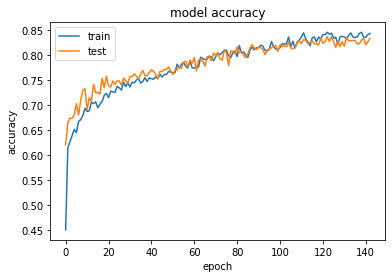

In [4]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

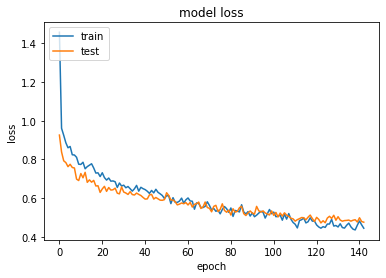

In [5]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import librosa
import os
import pywt
import cv2 as cvlib
from args import parser
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.layers.core import Flatten, Dense, Dropout
from keras.applications import Xception
from keras.models import model_from_json

def normalize_data_all_gather(vect_in, out_min, out_max, percent_acceptation=80,not_clip_until_acceptation_time_factor=1.5):
    percent_val = np.percentile(abs(vect_in).reshape((vect_in.shape[0], vect_in.shape[1] * vect_in.shape[2])),percent_acceptation, axis=1)
    percent_val_matrix = not_clip_until_acceptation_time_factor * np.repeat(percent_val,vect_in.shape[1] * vect_in.shape[2],axis=0).reshape((vect_in.shape[0], vect_in.shape[1], vect_in.shape[2]))
    matrix_clip = np.maximum(np.minimum(vect_in, percent_val_matrix), -percent_val_matrix)
    return np.divide(matrix_clip, percent_val_matrix) * ((out_max - out_min) / 2) + (out_max + out_min) / 2

filepath="/content/drive/MyDrive/DCASE2018-task5-dev/audio/DevNode4_ex30_79.wav"
print("---------------------------------------")
print("opening file")
n_fft = 40
hop_length = 20
clipnoise, sample_rate = librosa.load(filepath, duration=8.0)
scales = np.arange(1, 128)
waveletname = 'morl'
print("preprocessing file")
coeffnoise, freqnoise = pywt.cwt(clipnoise, scales, waveletname)
scalogramimg=cvlib.resize(coeffnoise, dsize=(299, 299), interpolation=cvlib.INTER_CUBIC)
stft = librosa.stft(clipnoise, n_fft=n_fft, hop_length=hop_length)
stft_magnitude, stft_phase = librosa.magphase(stft)
stft_magnitude_db = librosa.amplitude_to_db(stft_magnitude, ref=np.max)
spectrogramimg=cvlib.resize(stft_magnitude_db, dsize=(299, 299), interpolation=cvlib.INTER_CUBIC)
mfcc = librosa.feature.mfcc(y=clipnoise, sr=sample_rate, n_mfcc=200)
mfccimg=cvlib.resize(mfcc, dsize=(299, 299), interpolation=cvlib.INTER_CUBIC)
print("making RGB image")
RGB_test=np.zeros((1, 299, 299, 3))
RGB_test[0, :, :, 0] = spectrogramimg
RGB_test[0, :, :, 1] = scalogramimg
RGB_test[0, :, :, 2] = mfccimg

RGB_test[:, :, :, 0] = normalize_data_all_gather(RGB_test[:, :, :, 0], -1, 1, 95, 2)
RGB_test[:, :, :, 1] = normalize_data_all_gather(RGB_test[:, :, :, 1], -1, 1, 95, 2)
RGB_test[:, :, :, 2] = normalize_data_all_gather(RGB_test[:, :, :, 2], -1, 1, 95, 2)

print("Extracting Xception features")
model = Xception(weights='imagenet', include_top=False)
preds = model.predict(RGB_test)

pred_reduc_pool = preds.reshape((-1,2048 * 10 * 10))
print("Predicting Results")
json_file = open('model2.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("best_model.h5")
print("Loaded model from disk")

predictions = loaded_model.predict(pred_reduc_pool)
print(predictions)

---------------------------------------
opening file
preprocessing file
making RGB image
Extracting Xception features
Predicting Results
Loaded model from disk
[[1.5025194e-08 5.4269850e-01 8.9726259e-04 3.7340209e-04 2.5991818e-02
  5.1026128e-02 2.4084602e-03 1.3875032e-06 8.3014536e-05 3.7652004e-01]]


In [ ]:
classes={1:'absence',2:'cooking',3:'dishwashing',4:'eating',5:'other',6:'social_activity',7:'vacuum_cleaner',8:'watching_tv',9:'working'}
index=predictions[0].argmax(axis=0)
print("The predicted class is:-",classes[index])
print("With confidence:-",(predictions[0][index]*100),"%")

The predicted class is:- absence
With confidence:- 54.26985025405884 %


In [ ]:
meta="/content/drive/MyDrive/Prism_worklet/meta.txt"
file1 = open(meta, "r")
for line in file1:
  val=line.split()
  if(val[0]=="audio/DevNode4_ex30_79.wav"):
    print("Actual Class:",val[1])

absence
